In [1]:
from selective_bayes import *
import numpy as np
import math
import pandas as pd
from sklearn.metrics import normalized_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [2]:
dataset = pd.read_csv('adult.csv')
dataset = dataset.drop(columns=['Unnamed: 0'])
train, test = train_test_split(dataset, test_size=0.1)
columns_to_bin =  ['age', 'fnlwgt']

In [3]:
# #columns_to_encode = [col for col in dataset.columns if col not in columns_to_bin]
train, _ = preprocess_dataset(train, 'income', columns_to_bin=columns_to_bin, columns_to_encode=['income'])
test, _ = preprocess_dataset(test, 'income', columns_to_bin=columns_to_bin, columns_to_encode=['income'])

## Naive Bayes (with Laplace smoothing)

In [4]:
nb = NB_classifier(train, 'income')
nb_preds = []
gold_preds = []
for ind, example in test.iterrows():
    prediction = nb.classify(example)
    nb_preds.append(prediction)
    gold_preds.append(example['income'])
print(f'Accuracy Naive Bayes: {accuracy_score(gold_preds, nb_preds)}')

c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = instance[-1]


{0: 0.24462603753075038, 1: 1.8399002468860473e-06}
{0: 4.596114459967342e-06, 1: 0.00019245406828639368}
{0: 4.405937691570339e-06, 1: 3.9495472059498396e-08}
{0: 0.00010442293629886103, 1: 1.1181775073135945e-08}
{0: 0.0012218404687323616, 1: 0.0016286202492550314}
{0: 0.0029579212722015617, 1: 4.364086709266771e-06}
{0: 2.9132095226139485e-06, 1: 4.921410208240887e-09}
{0: 0.002858241215243102, 1: 1.8102368820674298e-08}
{0: 2.2773919537741124e-05, 1: 2.097774708143049e-06}
{0: 3.622100685423748e-10, 1: 0.0024910651539877893}
{0: 1.9358788259754454e-06, 1: 0.0020660078409586095}
{0: 7.135139192162748e-05, 1: 1.8360985586239767e-10}
{0: 0.003997329357562218, 1: 4.1808931012487085e-05}
{0: 3.125515340041483e-15, 1: 4.239932123943041e-11}
{0: 0.003964723009953928, 1: 0.004499566624677409}
{0: 0.00017671483611780508, 1: 4.4247504469870154e-07}
{0: 0.0033490059374182315, 1: 0.07130203774517643}
{0: 0.0001969667305780203, 1: 9.469784489787721e-05}
{0: 2.8579978511868868e-12, 1: 1.71547433

In [5]:
print(f'Recall Naive Bayes: {recall_score(gold_preds, nb_preds)}')

Recall Naive Bayes: 0.7977031802120141


In [6]:
snb = Selective_NB_classifier(train, target_col='income')

c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = instance[-1]


In [7]:
snb.calculate_mutual_information()
snb.order_by_mi()

In [8]:
snb.select_best_model()

Instance 35083
Instance 22056
Instance 17733
Instance 31017
Instance 46909
Instance 32699
Instance 2026
Instance 22333
Instance 11939
Instance 28896
Instance 7389
Instance 41195
Instance 20558
Instance 39826
Instance 8683
Instance 30533
Instance 15279
Instance 29055
Instance 3189
Instance 44445
Instance 21720
Instance 17302
Instance 18303
Instance 39099
Instance 13230
Instance 19096
Instance 43540
Instance 47900
Instance 7694
Instance 45506
Instance 27136
Instance 11293
Instance 34604
Instance 8157
Instance 657
Instance 38653
Instance 7782
Instance 29257
Instance 44659
Instance 43192
Instance 8574
Instance 33843


c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = example[-1]
c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:168: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_gold = example[-1] # true label
c:\Users\ultramarine\Desktop\studia_semestr_2\uczenie_maszynowe\projekt\selective_bayes.py:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a val

Instance 445
Instance 5659
Instance 42312
Instance 1433
Instance 30811
Instance 34374
Instance 2797
Instance 45908
Instance 47266
Instance 30189
Instance 10276
Instance 7603
Instance 13430
Instance 8852
Instance 38421
Instance 23335
Instance 35314
Instance 7060
Instance 13085
Instance 19105
Instance 8181
Instance 36236
Instance 29289
Instance 32995
Instance 9818
Instance 5220
Instance 24621
Instance 15148
Instance 48369
Instance 31633
Instance 26186
Instance 645
Instance 10461
Instance 36823
Instance 30598
Instance 21121
Instance 12050
Instance 19168
Instance 17378
Instance 23679
Instance 16979
Instance 23362
Instance 19172
Instance 21775
Instance 11025
Instance 8573
Instance 22176
Instance 39574
Instance 10089
Instance 21635
Instance 103
Instance 5478
Instance 29819
Instance 13606
Instance 7735
Instance 44579
Instance 31320
Instance 23892
Instance 42224
Instance 18937
Instance 35846
Instance 6487
Instance 3583
Instance 29676
Instance 10730
Instance 16821
Instance 10068
Instance 7230
I

In [10]:
snb.describe()

Model attributes ranked by mutual information: [10, 5, 7, 11, 0, 3, 4, 9, 6, 12, 1, 8, 13, 2]
Best model attributes: (10, 5, 7, 11, 0, 3, 4, 9, 6, 12)


In [15]:
snb.attr_mapping_reverse[10]

'capital-gain'

In [16]:
snb.attr_mapping_reverse[8]

'race'

## Perform classification on Adult dataset

In [ ]:
preds = []
gold = []
for ind, example in test.iterrows():
        prediction = snb.classify(example)
        preds.append(prediction)
        gold.append(example['income'])
print(f'Accuracy Selective Naive Bayes with optimal attributes: {accuracy_score(gold, preds)}')

## Confusion Matrix - Selective Naive Bayes

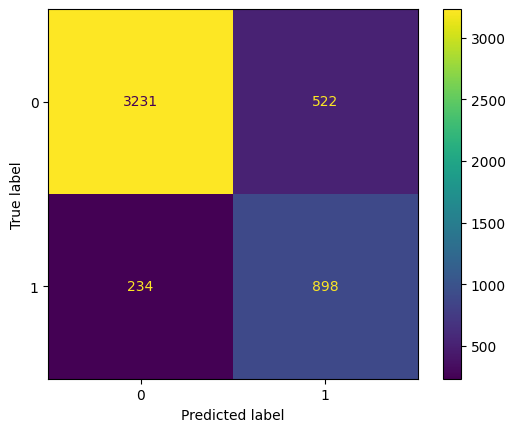

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(gold, preds, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

## Confusion Matrix Naive Bayes

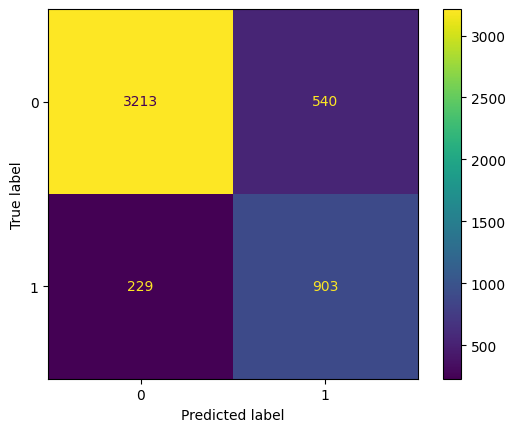

In [13]:
cm = confusion_matrix(gold_preds, nb_preds, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

## 10-fold attribute selection validation - TODO

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
